In [1]:
import numpy as np
import pandas as pd
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
from bart_playground import Tree, Parameters
from bart_playground import Grow, Prune, Change, Swap
from bart_playground import Dataset
from bart_playground import visualize_tree 
from bart_playground import *  # Import the updated DataGenerator class

In [3]:
dgen = DataGenerator(n_samples=100, n_features=3, noise=0.1, random_seed=42)
X, y = dgen.generate(scenario="linear")
data = Dataset(X, y, X)

rng = np.random.default_rng()

In [4]:
def tearDown(filename):
    expected_filepath = f"{filename}.png"
    if os.path.exists(expected_filepath):
        os.remove(expected_filepath)

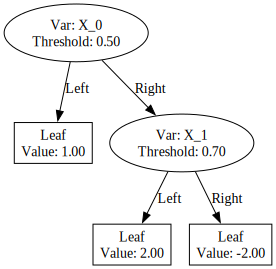

In [5]:
tree1 = Tree(data=data)
tree1.vars = np.array([0,-1, 1, -2, -2, -1, -1, -2], dtype=int)
tree1.thresholds = np.array([0.5, np.nan, 0.7, np.nan, np.nan, np.nan, np.nan, np.nan])
tree1.leaf_vals = np.array([np.nan, 1.0, np.nan, np.nan, np.nan, 2.0, -2.0, np.nan])
filename1 = "tree1"
visualize_tree(tree1, tree1, filename=filename1, format="png")

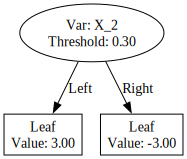

In [6]:
tree2 = Tree(data=data)
tree2.vars = np.array([2,-1, -1, -2], dtype=int)
tree2.thresholds = np.array([0.3, np.nan, np.nan, np.nan])
tree2.leaf_vals = np.array([np.nan, 3.0, -3.0, np.nan])
filename2 = "tree2"
visualize_tree(tree2, tree2, filename=filename2, format="png")

In [7]:
trees = [tree1,tree2]
params = Parameters(trees, None, data)
params.trees

[Tree(vars=[ 0 -1  1 -2 -2 -1 -1 -2], thresholds=[0.5 nan 0.7 nan nan nan nan nan], leaf_vals=[nan  1. nan nan nan  2. -2. nan], n_vals=[100  -2  -2  -2  -2  -2  -2  -2]),
 Tree(vars=[ 2 -1 -1 -2], thresholds=[0.3 nan nan nan], leaf_vals=[nan  3. -3. nan], n_vals=[100  -2  -2  -2  -2  -2  -2  -2])]

In [8]:
tearDown(filename1)
tearDown(filename2)

# Grow

In [9]:
move = Grow(params, trees_changed=[1])
move.propose(rng)
move.proposed.trees

[Tree(vars=[ 0 -1  1 -2 -2 -1 -1 -2], thresholds=[0.5 nan 0.7 nan nan nan nan nan], leaf_vals=[nan  1. nan nan nan  2. -2. nan], n_vals=[100  -2  -2  -2  -2  -2  -2  -2]),
 Tree(vars=[ 2 -1  2 -2 -2 -1 -1 -2], thresholds=[0.3             nan 0.7611397       nan       nan       nan       nan
        nan], leaf_vals=[nan  3. -3. nan nan nan nan nan], n_vals=[100  -2  -2  -2  -2   4   4  -2])]

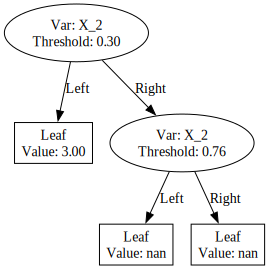

In [10]:
tree_g = move.proposed.trees[1]
filename1 = "tree_g"
visualize_tree(tree_g, tree_g, filename=filename1, format="png")

# Prune

In [11]:
trees = [tree1,tree2]
params = Parameters(trees, None, data)

move = Prune(params, trees_changed=[0])
move.propose(rng)
move.proposed.trees

[Tree(vars=[ 0 -1 -1 -2 -2 -2 -2 -2], thresholds=[0.5 nan nan nan nan nan nan nan], leaf_vals=[nan  1. nan nan nan  2. -2. nan], n_vals=[100  -2  -2  -2  -2  -2  -2  -2]),
 Tree(vars=[ 2 -1 -1 -2], thresholds=[0.3 nan nan nan], leaf_vals=[nan  3. -3. nan], n_vals=[100  -2  -2  -2  -2  -2  -2  -2])]

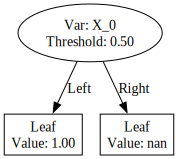

In [12]:
tree_p = move.proposed.trees[0]
filename2 = "tree_p"
visualize_tree(tree_p, tree_p, filename=filename2, format="png")

# Change

In [13]:
trees = [tree1,tree2]
params = Parameters(trees, None, data)

move = Change(params, trees_changed=[0])
move.propose(rng)
move.proposed.trees

[Tree(vars=[ 0 -1  1 -2 -2 -1 -1 -2], thresholds=[0.77395605        nan 0.7               nan        nan        nan
         nan        nan], leaf_vals=[nan  1. nan nan nan  2. -2. nan], n_vals=[100  80  20  -2  -2  11   9  -2]),
 Tree(vars=[ 2 -1 -1 -2], thresholds=[0.3 nan nan nan], leaf_vals=[nan  3. -3. nan], n_vals=[100  -2  -2  -2  -2  -2  -2  -2])]

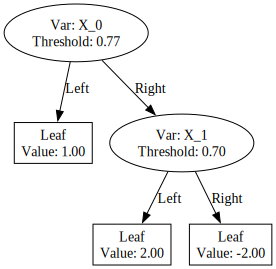

In [14]:
tree_c = move.proposed.trees[0]
filename3 = "tree_c"
visualize_tree(tree_c, tree_c, filename=filename3, format="png")

# Swap

In [15]:
trees = [tree1,tree2]
params = Parameters(trees, None, data)

move = Swap(params, trees_changed=[0])
move.propose(rng)
move.proposed.trees

[Tree(vars=[ 1 -1  0 -2 -2 -1 -1 -2], thresholds=[0.7 nan 0.5 nan nan nan nan nan], leaf_vals=[nan  1. nan nan nan  2. -2. nan], n_vals=[100  69  31  -2  -2  15  16  -2]),
 Tree(vars=[ 2 -1 -1 -2], thresholds=[0.3 nan nan nan], leaf_vals=[nan  3. -3. nan], n_vals=[100  -2  -2  -2  -2  -2  -2  -2])]

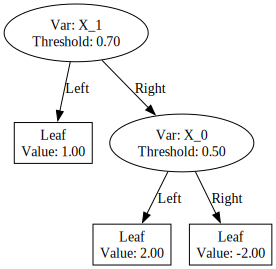

In [16]:
tree_s = move.proposed.trees[0]
filename4 = "tree_s"
visualize_tree(tree_s, tree_s, filename=filename4, format="png")

In [17]:
tearDown(filename1)
tearDown(filename2)
tearDown(filename3)
tearDown(filename4)